In [2]:
pip install opencv-python numpy easyocr imutils matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import necessary libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import os

# Set the folder path where the images are stored
folder_path = '/home/ep/Documents/Github/Computer_Vision/ANPRwithPython-main'

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])


NotADirectoryError: [Errno 20] Not a directory: '/home/ep/Documents/Github/Computer_Vision/ANPRwithPython-main/image10.png'

Detect Plates in Each Image

In [10]:
# Loop through each image in the folder
for image_file in image_files:
    print(f"Processing {image_file}...")

    # Build the full image path
    img_path = os.path.join(folder_path, image_file)
    
    # Read the image
    img = cv2.imread(img_path)
    
    # Check if the image was successfully loaded
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue  # Skip to the next image if there's an error


Processing 9_rlt.png...
Processing image7.jpg...
Processing image1.jpg...
Processing image2.jpg...
Processing image10.png...
Processing image4.jpg...
Processing image8.jpg...
Processing image3.jpg...
Processing image6.jpg...


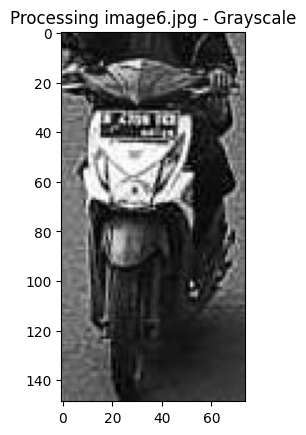

In [11]:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    plt.title(f"Processing {image_file} - Grayscale")
    plt.show()


Counting Detected Plates and Extracting Plate Numbers

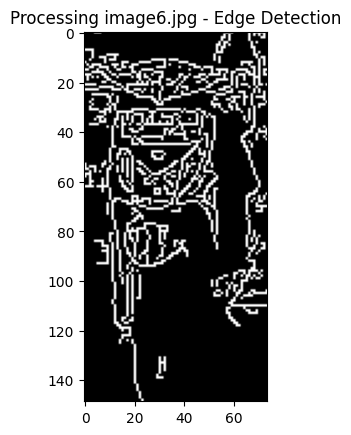

In [12]:
    # Apply bilateral filter for noise reduction
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    
    # Edge detection using Canny
    edged = cv2.Canny(bfilter, 30, 200)
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
    plt.title(f"Processing {image_file} - Edge Detection")
    plt.show()


Generating Summary of Results

In [13]:
    # Find contours
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None  # Initialize the location variable

    # Loop through contours and find the first quadrilateral
    for contour in contours:
        approx = cv2.approxPolyDP(contour, epsilon=0.02 * cv2.arcLength(contour, True), closed=True)
        if len(approx) == 4:
            location = approx
            break

    if location is not None:
        print(f"Found a quadrilateral in {image_file}: {location}")
    else:
        print(f"No quadrilateral found in {image_file}.")
        continue  # Skip to the next image if no quadrilateral is found


SyntaxError: 'continue' not properly in loop (2242876862.py, line 19)

In [ ]:
    # Create a mask and extract the region of interest (ROI)
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Processing {image_file} - Masked Image")
    plt.show()


In [14]:
    # Crop the image based on the detected quadrilateral
    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Processing {image_file} - Cropped Image")
    plt.show()


NameError: name 'mask' is not defined

In [15]:
    # Perform OCR on the cropped image
    result = reader.readtext(cropped_image)
    if result:
        text = result[0][-2]
        print(f"OCR Text for {image_file}: {text}")

        # Annotate the original image with the detected text and quadrilateral
        font = cv2.FONT_HERSHEY_SIMPLEX
        res = cv2.putText(img, text=text, org=(location[0][0][0], location[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
        res = cv2.rectangle(img, tuple(location[0][0]), tuple(location[2][0]), (0, 255, 0), 3)
        
        # Display the final annotated image
        plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
        plt.title(f"Processing {image_file} - Annotated Image")
        plt.show()
    else:
        print(f"No text detected in {image_file}.")


NameError: name 'cropped_image' is not defined